<IPython.core.display.Javascript object>


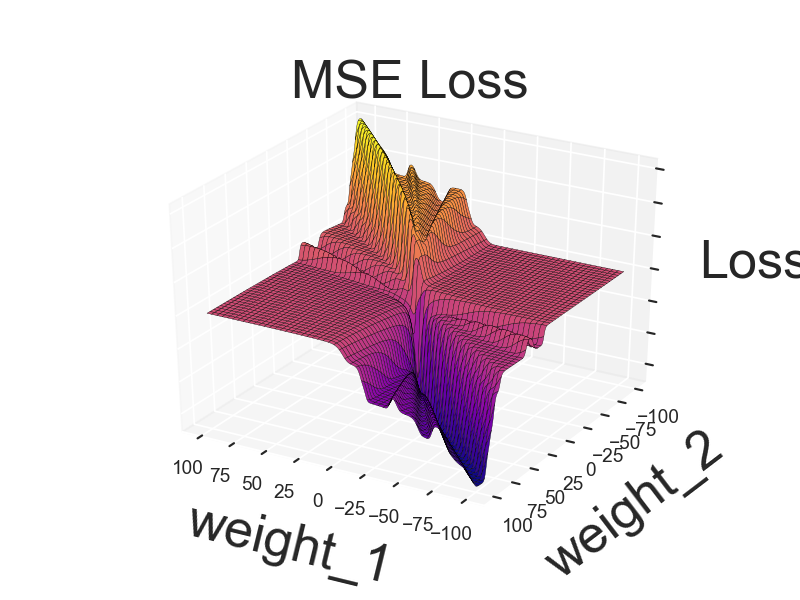

Press <Enter>...


<IPython.core.display.Javascript object>


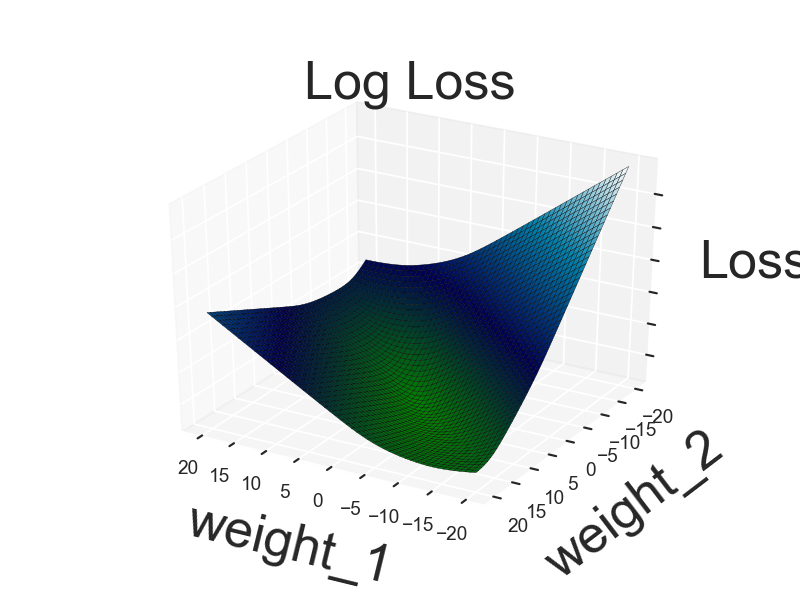

Enter to exit...


''

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sigmoid = lambda z : 1 / (1 + np.exp(-z))

forward_pass = lambda X, w : sigmoid(np.matmul(X, w))
mean_squared_error_loss = lambda X, Y, w : np.average((forward_pass(X, w) - Y) ** 2)

log_loss = lambda X, Y, w : -np.average(Y * np.log(sigmoid(np.matmul(X, w))) + (1 - Y) * np.log(1 - sigmoid(np.matmul(X, w))))

def get_axes():
    ax = plt.figure().gca(projection="3d")
    ax.clear()
    ax.set_zticklabels(())
    ax.set_xlabel("weight_1", labelpad=15, fontsize=30)
    ax.set_ylabel("weight_2", labelpad=15, fontsize=30)
    ax.set_zlabel("Loss", labelpad=15, fontsize=30)
    ax.view_init(30, 120)
    return ax


np.random.seed(1994)
X = np.random.rand(20, 2) # 20 örnek
w = [1.23, 2.34]
Y = np.dot(X, w)
Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)


size_of_mesh = 400
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# MSE Loss
ax = get_axes()
plt.title("MSE Loss", fontsize=30)
view_interval = 100
W1, W2 = np.meshgrid(np.linspace(-view_interval, view_interval, size_of_mesh),
                     np.linspace(-view_interval, view_interval, size_of_mesh))
losses = np.array([mean_squared_error_loss(X, Y_binary, [w1, w2]) for w1, w2
                   in zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((size_of_mesh, size_of_mesh))
ax.plot_surface(W1, W2, L, cmap=cm.plasma, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.ion()
plt.show()
input("Press <Enter>...")

# Log Loss
ax = get_axes()
plt.title("Log Loss", fontsize=30)
view_interval = 20
W1, W2 = np.meshgrid(np.linspace(-view_interval, view_interval, size_of_mesh),
                     np.linspace(-view_interval, view_interval, size_of_mesh))
losses = np.array([log_loss(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((size_of_mesh, size_of_mesh))
ax.plot_surface(W1, W2, L, cmap=cm.ocean, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.show()
input("Enter to exit...")